# Student Performance Indicator

##Life cycle of Machine learning Project



*   Understanding the Problem Statement
*   Data Collection

*   Data Checks to perform

*   Exploratory data analysis

*   Data Pre-Processing
*   Model Training


*   Choose best model

# 1) Problem Statement


*   This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


# 2) Data collection


*   Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

*  The data consists of 8 column and 1000 rows.





# 2.1 Import data and required pacakges

## Importing pandas, numpy, seaborn, matplotlib, warnings libraries.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Import dataset as Pandas dataframe**

In [4]:
df = pd.read_csv('/content/student_performance.csv')

**Show top 5 records**

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Shape of the dataset**

In [6]:
df.shape

(1000, 8)

## 2.2 Dataset information

• gender : sex of students -> (Male/female)

• race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

• parental level of education : parents' final education degree,some college,master's degree,associate's degree,high school)

• lunch : having lunch before test (standard or free/reduced)

• test preparation course : complete or not complete before test

• math score

• reading score

• writing score

# 3) Data checks to perform


*   Check missing values

*   Check duplicates

*   Check datatype

*   Check the number of unique values of each column
*   Check Statistics of the dataset


*   Check various categories present in the different categorical column




## 3.1 Check Missing values

In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing values in the dataset**

## 3.2 Check Duplicate values

In [8]:
df.duplicated().sum()

0

**There are no duplicate values in the whole dataset.**

## 3.3 Check datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Checking the number of unique values of each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5 Check statistics of data set

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**INSIGHT**


*   From above description of numerical data, all means are very close to each other - between 66 and 68.05;
*   All standard deviations are also close - between 14.6 and 15.19;

*   While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17





## 3.6 Check various categories present in the different categorical column

In [12]:
print("The different categories in 'Gender' column:", df['gender'].unique())
print("The different categories in 'race ethnicity' column:", df['race_ethnicity'].unique())
print("The different categories in 'parental_level_of_education' column:", df['parental_level_of_education'].unique())
print("The different categories in 'lunch' column:", df['lunch'].unique())
print("The different categories in 'test_preparation_course' column:", df['test_preparation_course'].unique())

The different categories in 'Gender' column: ['female' 'male']
The different categories in 'race ethnicity' column: ['group B' 'group C' 'group A' 'group D' 'group E']
The different categories in 'parental_level_of_education' column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The different categories in 'lunch' column: ['standard' 'free/reduced']
The different categories in 'test_preparation_course' column: ['none' 'completed']


## 3.7 Exploring the data


In [13]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [14]:
len(numerical_features)

3

In [15]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [16]:
print("We have {0} numerical features, they are {1}".format(len(numerical_features), numerical_features))
print("We have {0} categorical features, they are {1}".format(len(categorical_features), categorical_features))

We have 3 numerical features, they are ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features, they are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## 3.8 Adding columns to get Total score and average score

In [17]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
math_score_full = df[df['math_score'] == 100]['math_score'].count()
reading_score_full = df[df['reading_score'] == 100]['reading_score'].count()
writing_score_full = df[df['writing_score'] == 100]['writing_score'].count()

print(f'Number of students with full marks in Math: {math_score_full}')
print(f'Number of students with full marks in Reading: {reading_score_full}')
print(f'Number of students with full marks in Writing: {writing_score_full}')

Number of students with full marks in Math: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [19]:
math_score_less = df[df['math_score'] <= 20]['math_score'].count()
reading_score_less = df[df['reading_score'] <= 20]['reading_score'].count()
writing_score_less = df[df['writing_score'] <= 20]['writing_score'].count()

print(f'Number of students with less marks in Math: {math_score_less}')
print(f'Number of students with less marks in Reading: {reading_score_less}')
print(f'Number of students with less marks in Writing: {writing_score_less}')

Number of students with less marks in Math: 4
Number of students with less marks in Reading: 1
Number of students with less marks in Writing: 3


**INSIGHT**


*   From the above analysis, we can see that the worst performance is in MATHS
*   And the best perfomance is in READING



# Exploratory Data Analysis (Visualization)

## 4.1 Visualize avg. score of the students

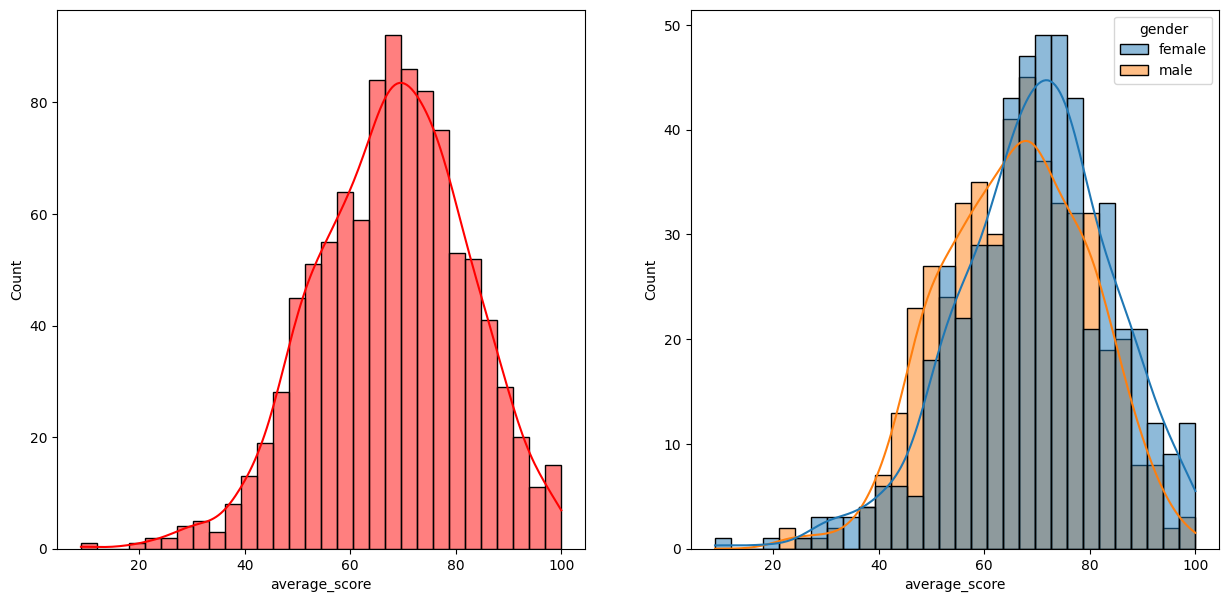

In [20]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'average_score', kde = True, bins = 30, color = 'r')
plt.subplot(122)
sns.histplot(data = df, x = 'average_score', kde = True, bins = 30, hue = 'gender')
plt.show()

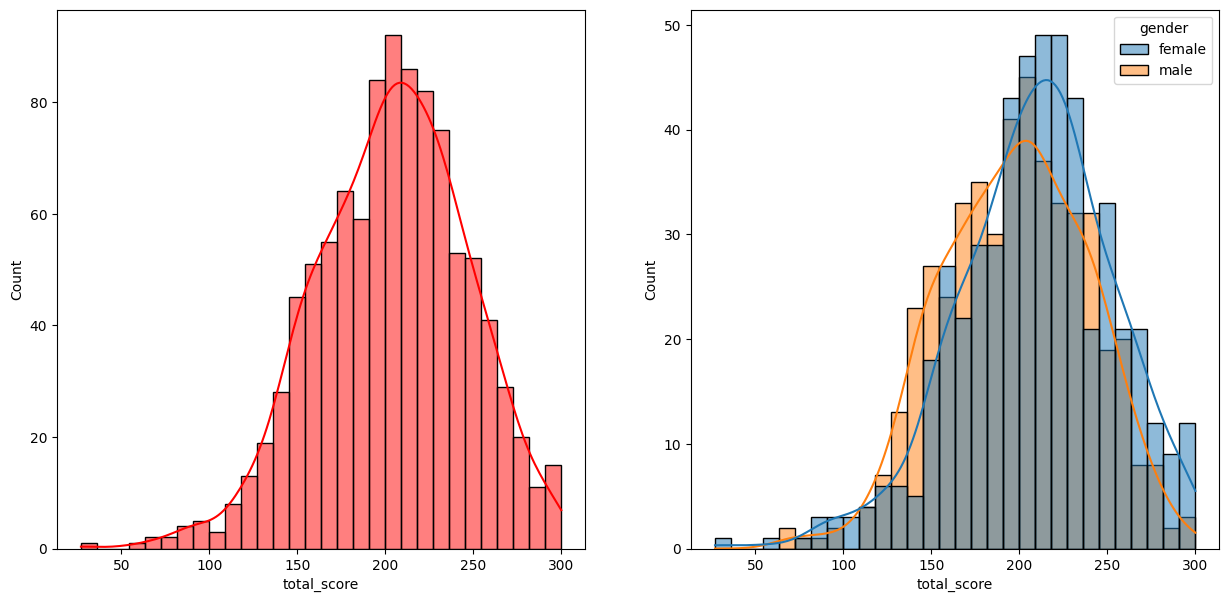

In [21]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'total_score', kde = True, bins = 30, color = 'r')
plt.subplot(122)
sns.histplot(data = df, x = 'total_score', kde = True, bins = 30, hue = 'gender')
plt.show()

**Female students tend to perform better than Male students**

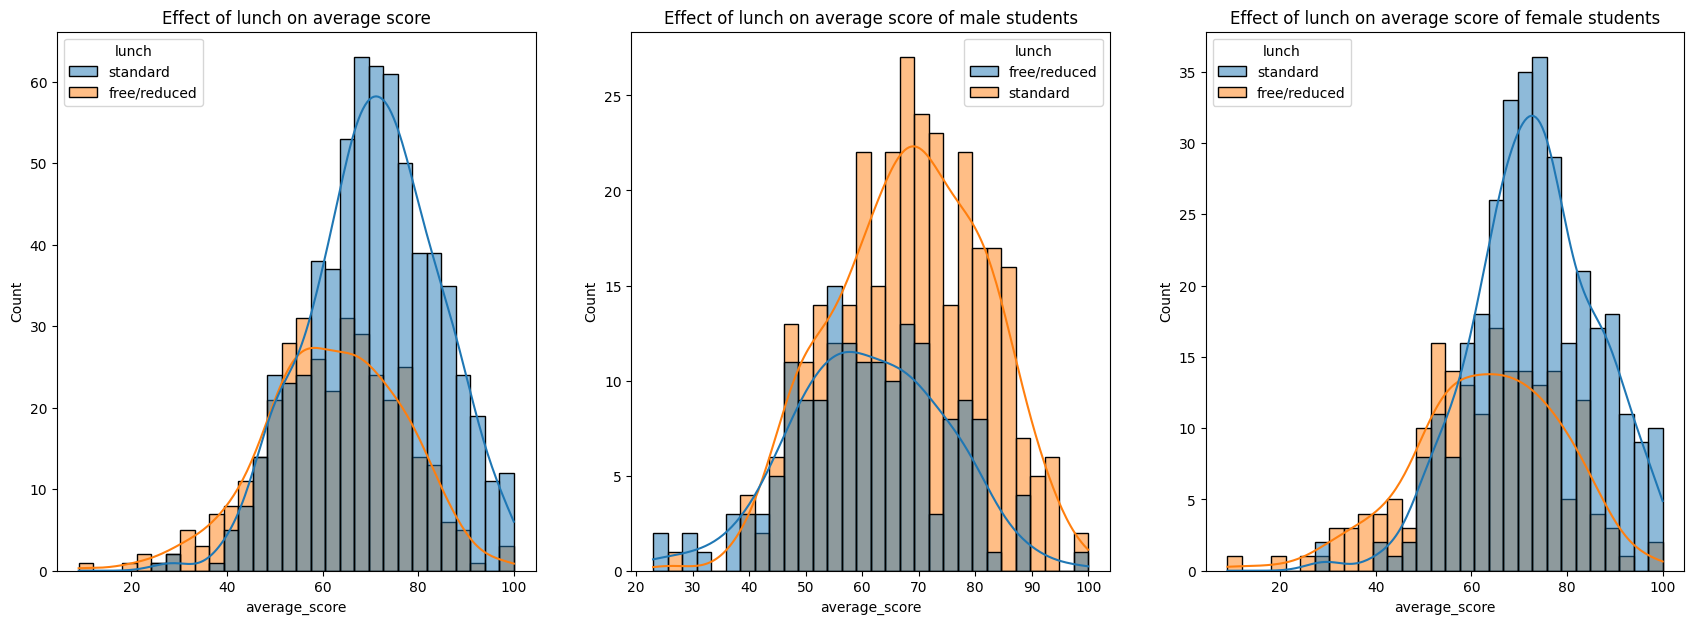

In [22]:
fig, axs = plt.subplots(1,3, figsize = (21,7))
plt.subplot(131)
sns.histplot(data = df, x = 'average_score', kde = True, bins = 30, hue = 'lunch')
plt.title('Effect of lunch on average score')
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average_score', kde = True, bins = 30, hue = 'lunch')
plt.title('Effect of lunch on average score of male students')
plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average_score', kde = True, bins = 30, hue = 'lunch')
plt.title('Effect of lunch on average score of female students')
plt.show()

**INSIGHT**


*   Standard lunch helps perform well in exams, to score good marks
*   Standard lunch improves average score whether it be male or female.



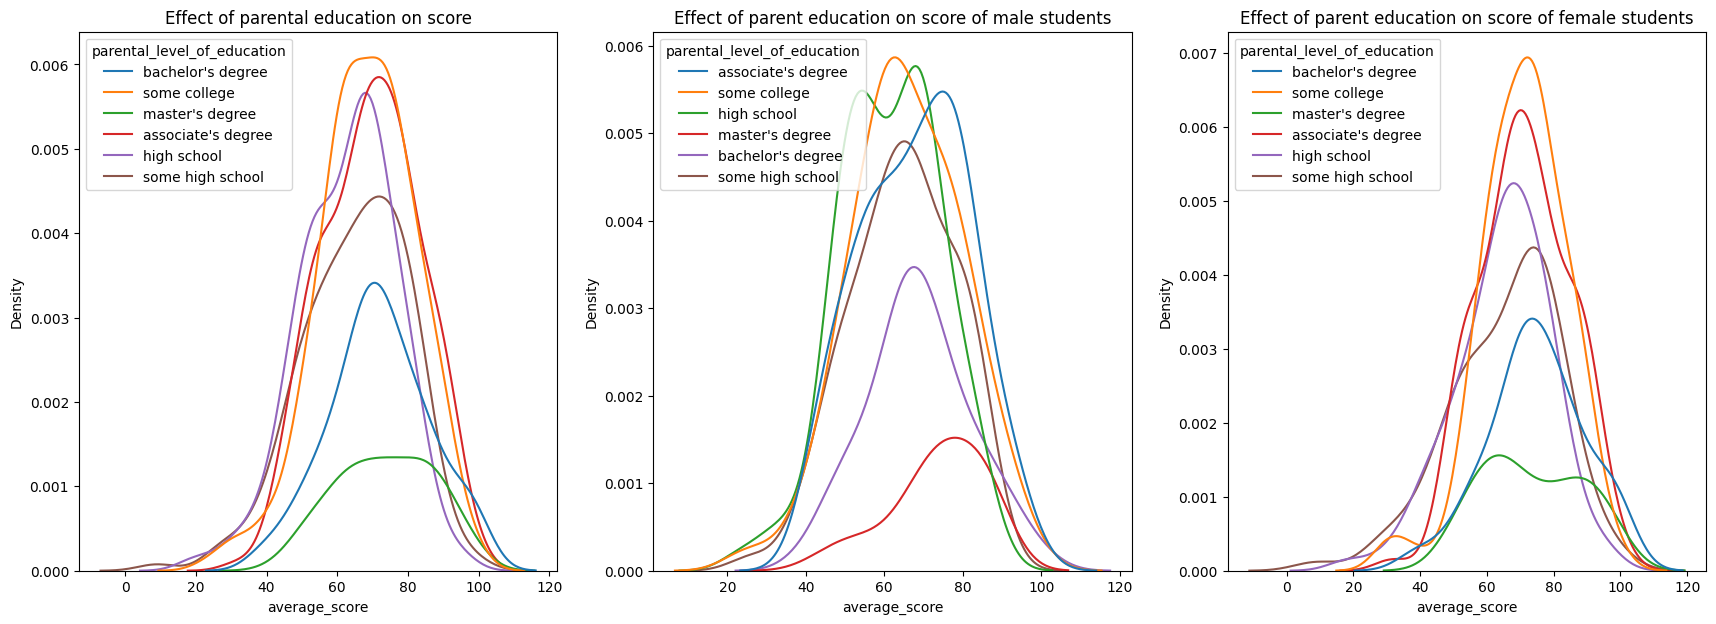

In [23]:
fig, axs = plt.subplots(1,3, figsize = (21,7))
plt.subplot(131)
sns.kdeplot(data = df, x = 'average_score', hue = 'parental_level_of_education')
plt.title('Effect of parental education on score')
plt.subplot(132)
sns.kdeplot(data = df[df['gender'] == 'male'], x = 'average_score', hue = 'parental_level_of_education')
plt.title('Effect of parent education on score of male students')
plt.subplot(133)
sns.kdeplot(data = df[df['gender'] == 'female'], x = 'average_score', hue = 'parental_level_of_education')
plt.title('Effect of parent education on score of female students')
plt.show()

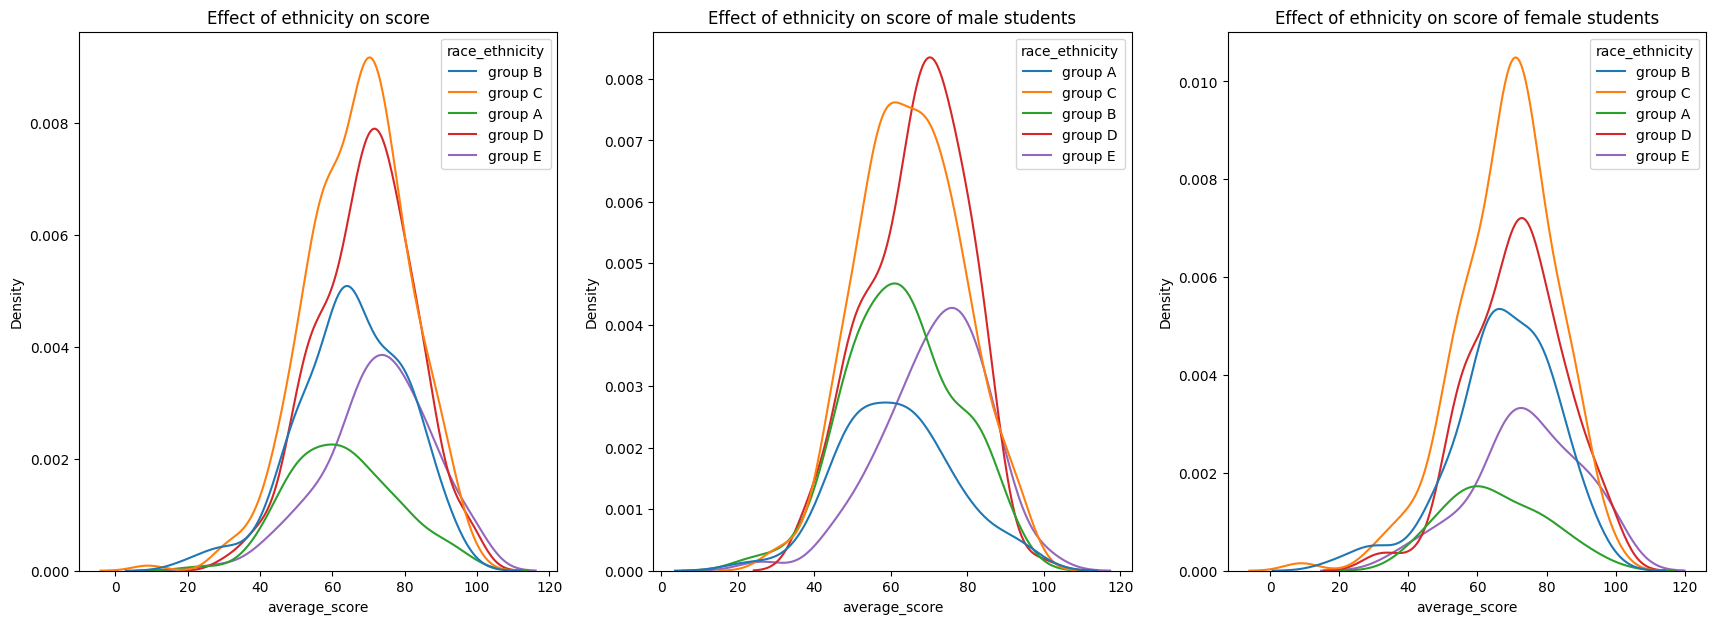

In [24]:
fig, axs = plt.subplots(1,3, figsize = (21,7))
plt.subplot(131)
sns.kdeplot(data = df, x = 'average_score', hue = 'race_ethnicity')
plt.title('Effect of ethnicity on score')
plt.subplot(132)
sns.kdeplot(data = df[df['gender'] == 'male'], x = 'average_score', hue = 'race_ethnicity')
plt.title('Effect of ethnicity on score of male students')
plt.subplot(133)
sns.kdeplot(data = df[df['gender'] == 'female'], x = 'average_score', hue = 'race_ethnicity')
plt.title('Effect of ethnicity on score of female students')
plt.show()

## 4.2 Maxmium score in three subjects

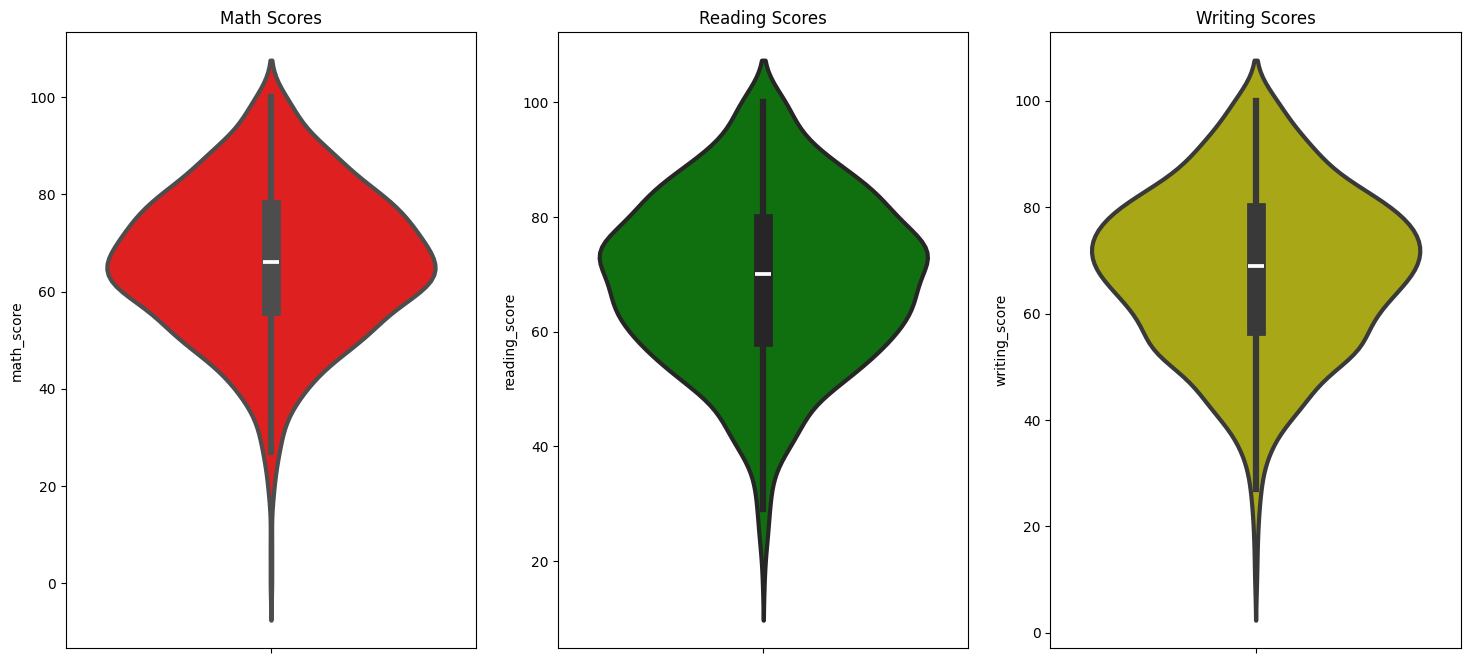

In [25]:
plt.figure(figsize = (18,8))
plt.subplot(131)
plt.title('Math Scores')
sns.violinplot(data = df, y = 'math_score', color = 'r', linewidth = 3)
plt.subplot(132)
plt.title('Reading Scores')
sns.violinplot(data = df, y = 'reading_score', color = 'g', linewidth = 3)
plt.subplot(133)
plt.title('Writing Scores')
sns.violinplot(data = df, y = 'writing_score', color = 'y', linewidth = 3)
plt.show()

**INSIGHT**


*   From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80



## 4.3 Pie plots for categorical features

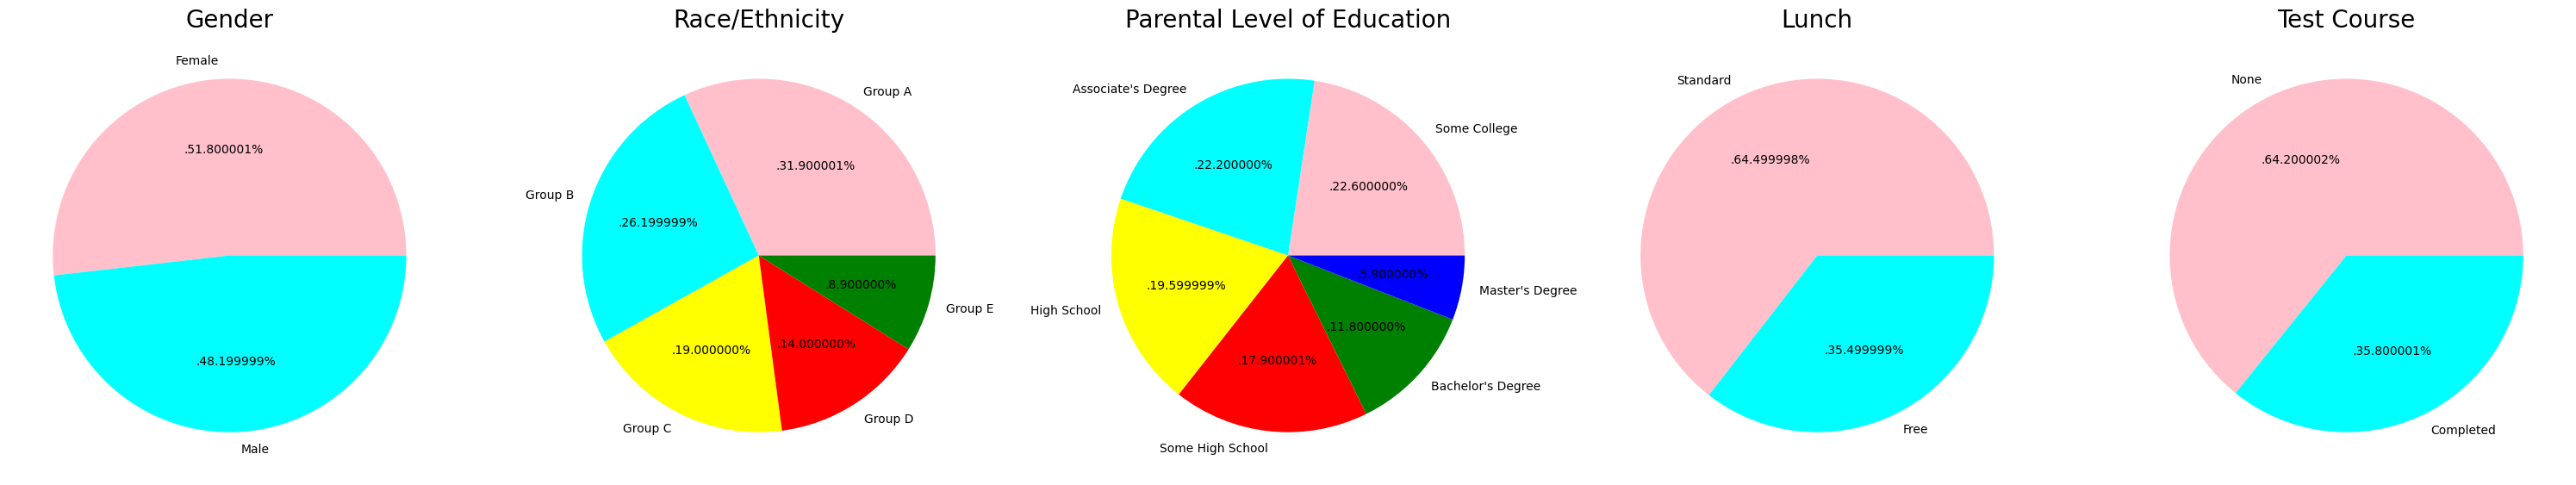

In [26]:
plt.figure(figsize = (30,12))

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['pink','cyan']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group A', 'Group B', 'Group C', 'Group D', 'Group E'
color = ['pink','cyan','yellow','red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['pink','cyan','yellow','red','green','blue']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Parental Level of Education', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['pink','cyan']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['pink','cyan']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


**INSIGHT**

Number of Male and Female students is almost equal

Number students are greatest in Group C

Number of students who have standard lunch are greater

Number of students who have not enrolled in any test preparation course is greater

Number of students whose parental education is "Some College" is greater
followed closely by "Associate's Degree"

## 4.4 Feature wise Visualization

**Gender column**

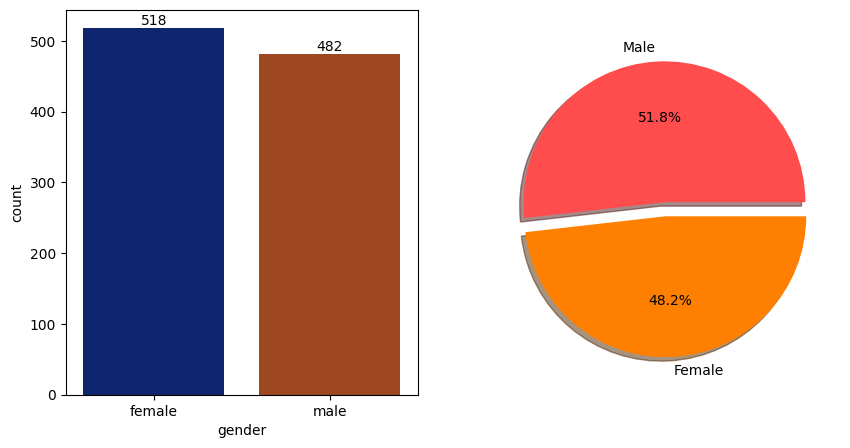

In [27]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['gender'],data=df,palette ='dark',ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

**INSIGHT**


*   Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)



In [28]:
gender_group = df.groupby('gender').mean(numeric_only = True)
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


**Race/Ethnicity column**

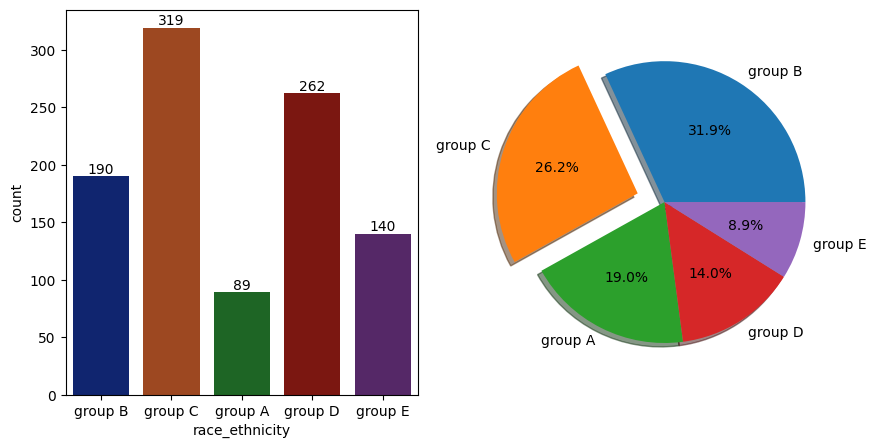

In [35]:
f, ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['race_ethnicity'],data=df,palette ='dark',ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)

plt.pie(x = df['race_ethnicity'].value_counts(), autopct = '%0.1f%%', shadow = True, explode = [0,0.2,0,0,0], labels = df['race_ethnicity'].unique())
plt.show()


**INSIGHT**


*   Most of the student belonging from group C /group D.
Lowest number of students belong to groupA.



**Parental level of education column**

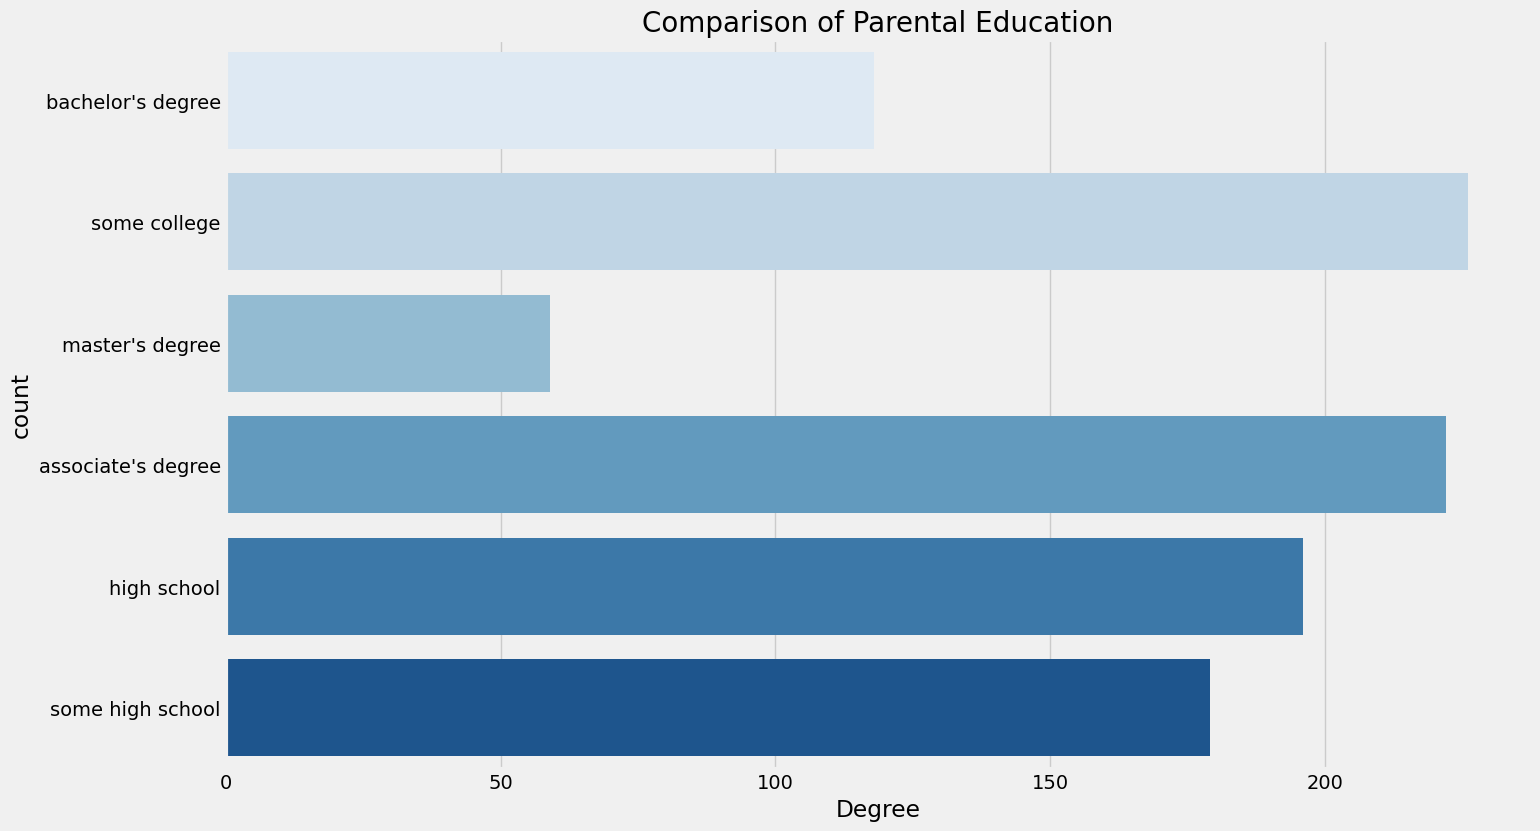

In [48]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

** Lunch column**

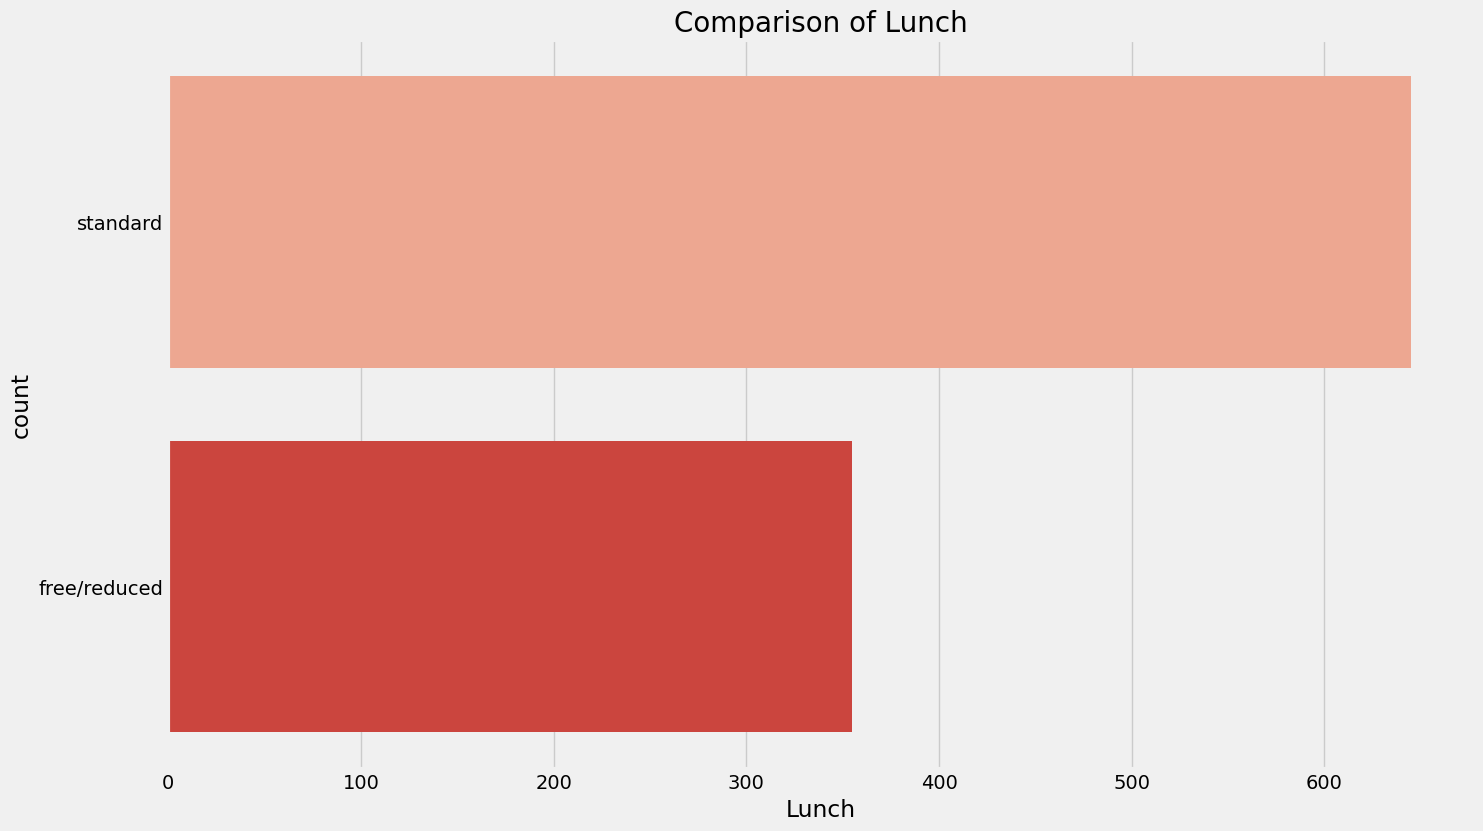

In [53]:
plt.rcParams['figure.figsize'] = (15,9)
# plt.style.use('fivethirtynine')
sns.countplot(df['lunch'], palette = 'Reds')
plt.title('Comparison of Lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Lunch')
plt.ylabel('count')
plt.show()